In [1]:
#term deposit project

In [131]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [132]:
term_deposit = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
term_deposit

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


#there are 31647 rows and 18 column

# EDA

In [133]:
term_deposit.shape

(31647, 18)

In [134]:
term_deposit.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

there is no null values

<AxesSubplot:title={'center':'Null values '}>

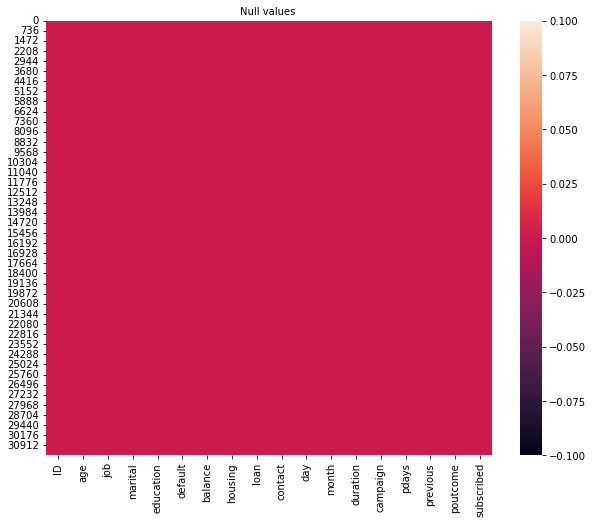

In [135]:
#ploting dataset for double check null values

plt.figure(figsize=(10,8))
plt.title('Null values ',fontsize=10)
sns.heatmap(term_deposit.isnull())

again proves no null value

In [136]:
term_deposit.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In the above cell nunique gives us a list of total number of unique values present in each column of our dataframe.

In [137]:
term_deposit.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [138]:
for i in term_deposit.columns:
        print(term_deposit[i].value_counts())
        print('___________'*10)

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
______________________________________________________________________________________________________________
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
______________________________________________________________________________________________________________
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
______________________________________________________________________________________________________________
married     19095
single       8922
divorced     3630
Name: mar

above code gives the name of unique values of each column

In [139]:
term_deposit.info() # checking datatype of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [140]:
term_deposit.dtypes[term_deposit.dtypes == 'object'].to_frame('Object Data Types')

,Object Data Types
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
poutcome,object
subscribed,object


In [141]:
term_deposit.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [142]:
term_deposit.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [143]:
(term_deposit==0).sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance        2470
housing           0
loan              0
contact           0
day               0
month             0
duration          1
campaign          0
pdays             0
previous      25924
poutcome          0
subscribed        0
dtype: int64

In [144]:
term_deposit.drop('ID', axis=1, inplace=True)
term_deposit

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


ID ha less relevence in finding the target. can be proved by bivariate analysis

In [145]:
object_datatype = []
for x in term_deposit.dtypes.index:
    if term_deposit.dtypes[x] == 'O':
        object_datatype.append(x)
object_datatype

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

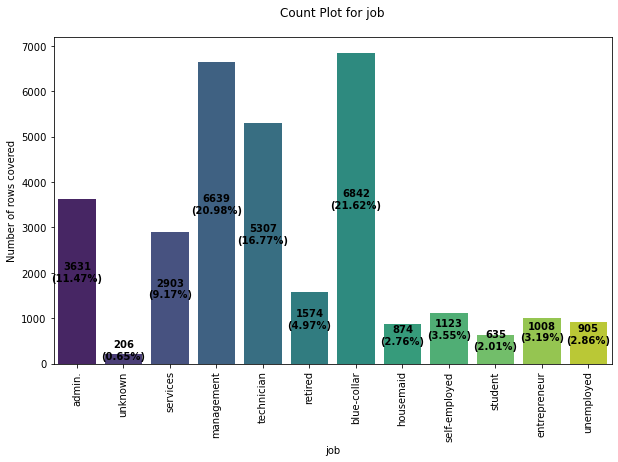

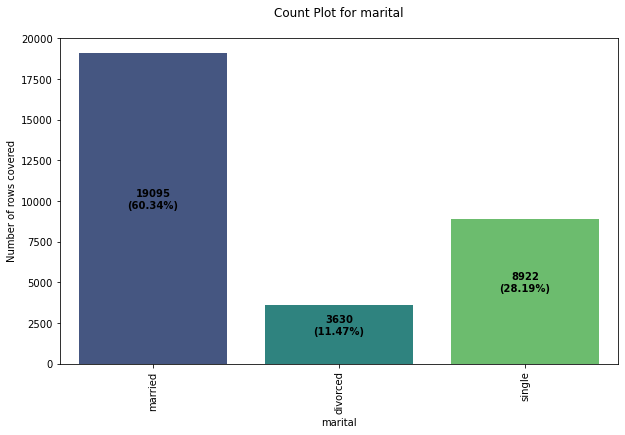

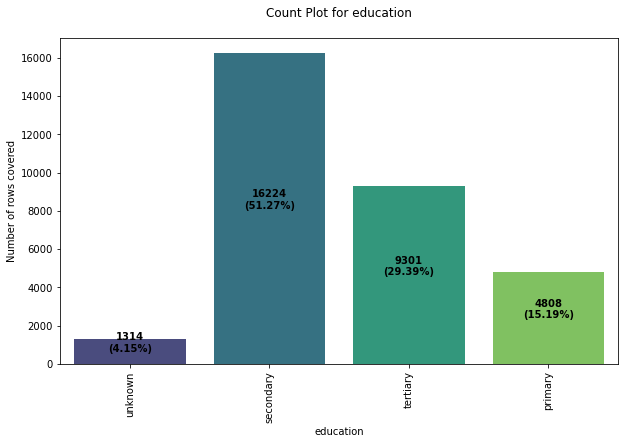

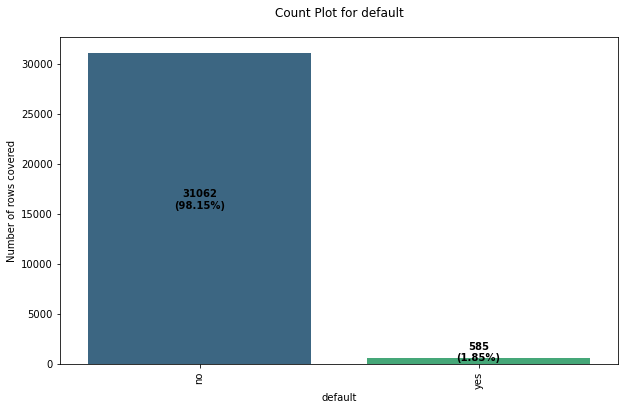

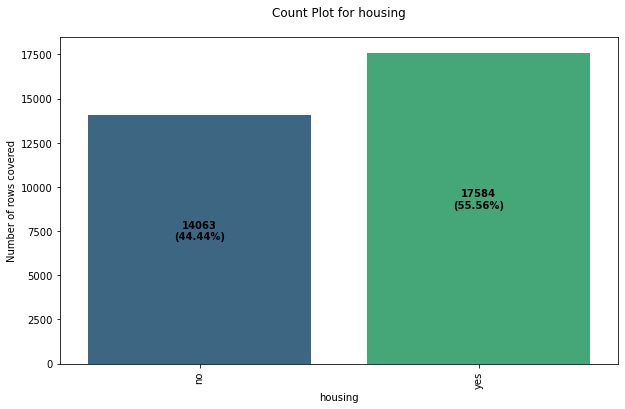

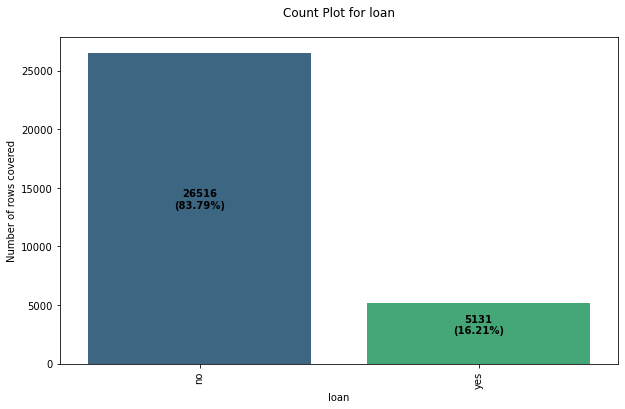

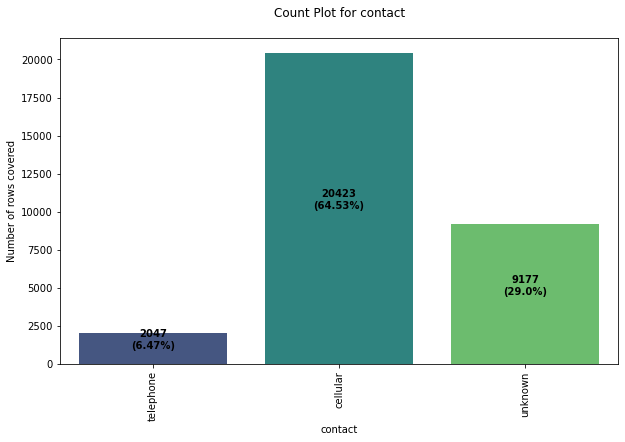

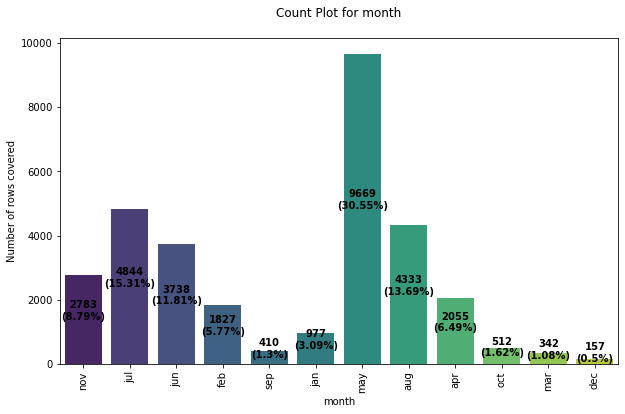

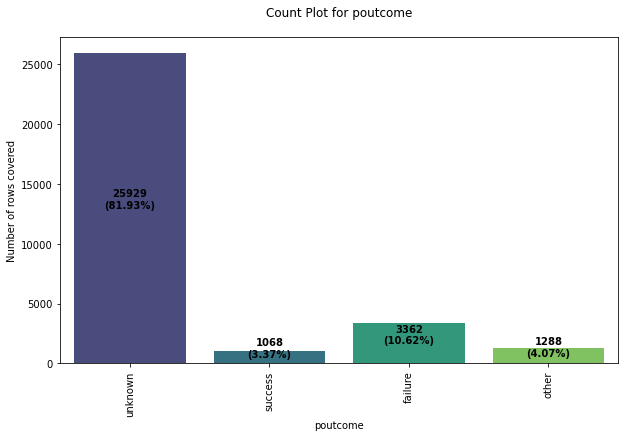

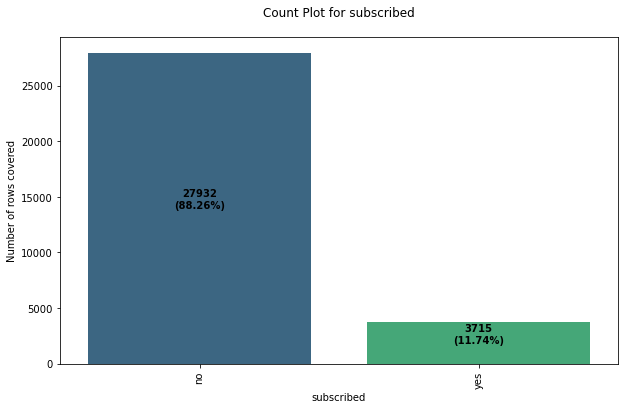

In [146]:
for col in object_datatype:
    plt.figure(figsize=(10,6))
    col_name = col
    values = term_deposit[col_name].value_counts()
    index = 0
    ax = sns.countplot(term_deposit[col_name], palette="viridis")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(term_deposit[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

In [147]:
le= LabelEncoder()
for col in object_datatype:
    term_deposit[col]= le.fit_transform(term_deposit[col])
    
term_deposit

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


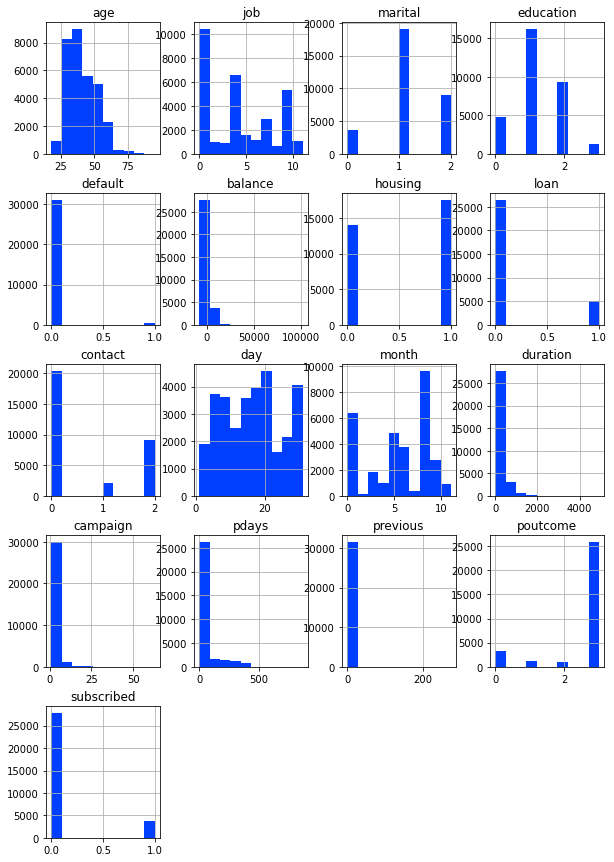

In [148]:
# Visualising data distribution for every column
plt.style.use('seaborn-bright')

term_deposit.hist(figsize=(10,15))
plt.show()

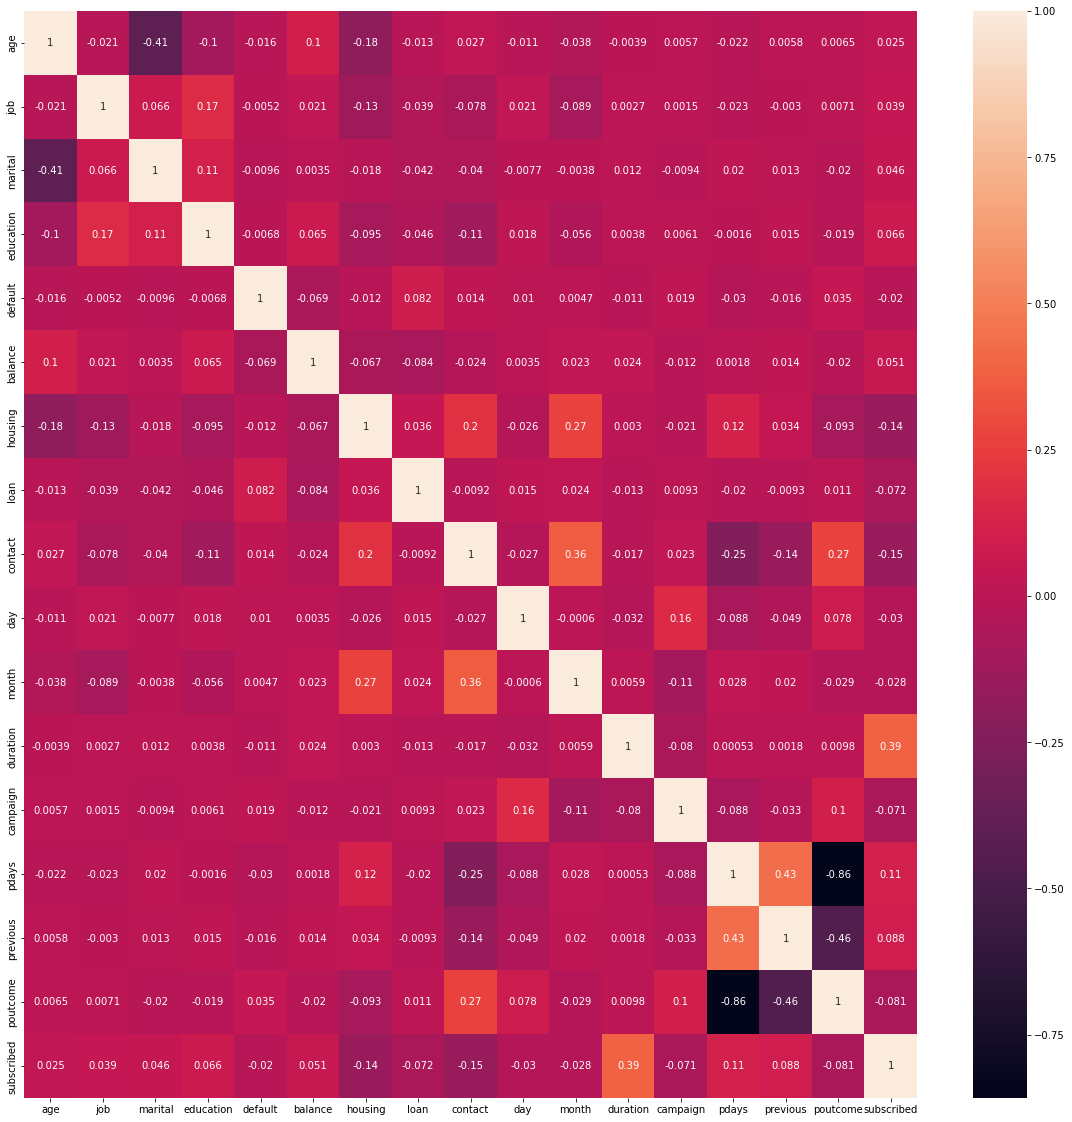

In [149]:
plt.figure(figsize=(20,20))
sns.heatmap(term_deposit.corr(), annot=True)
plt.show()

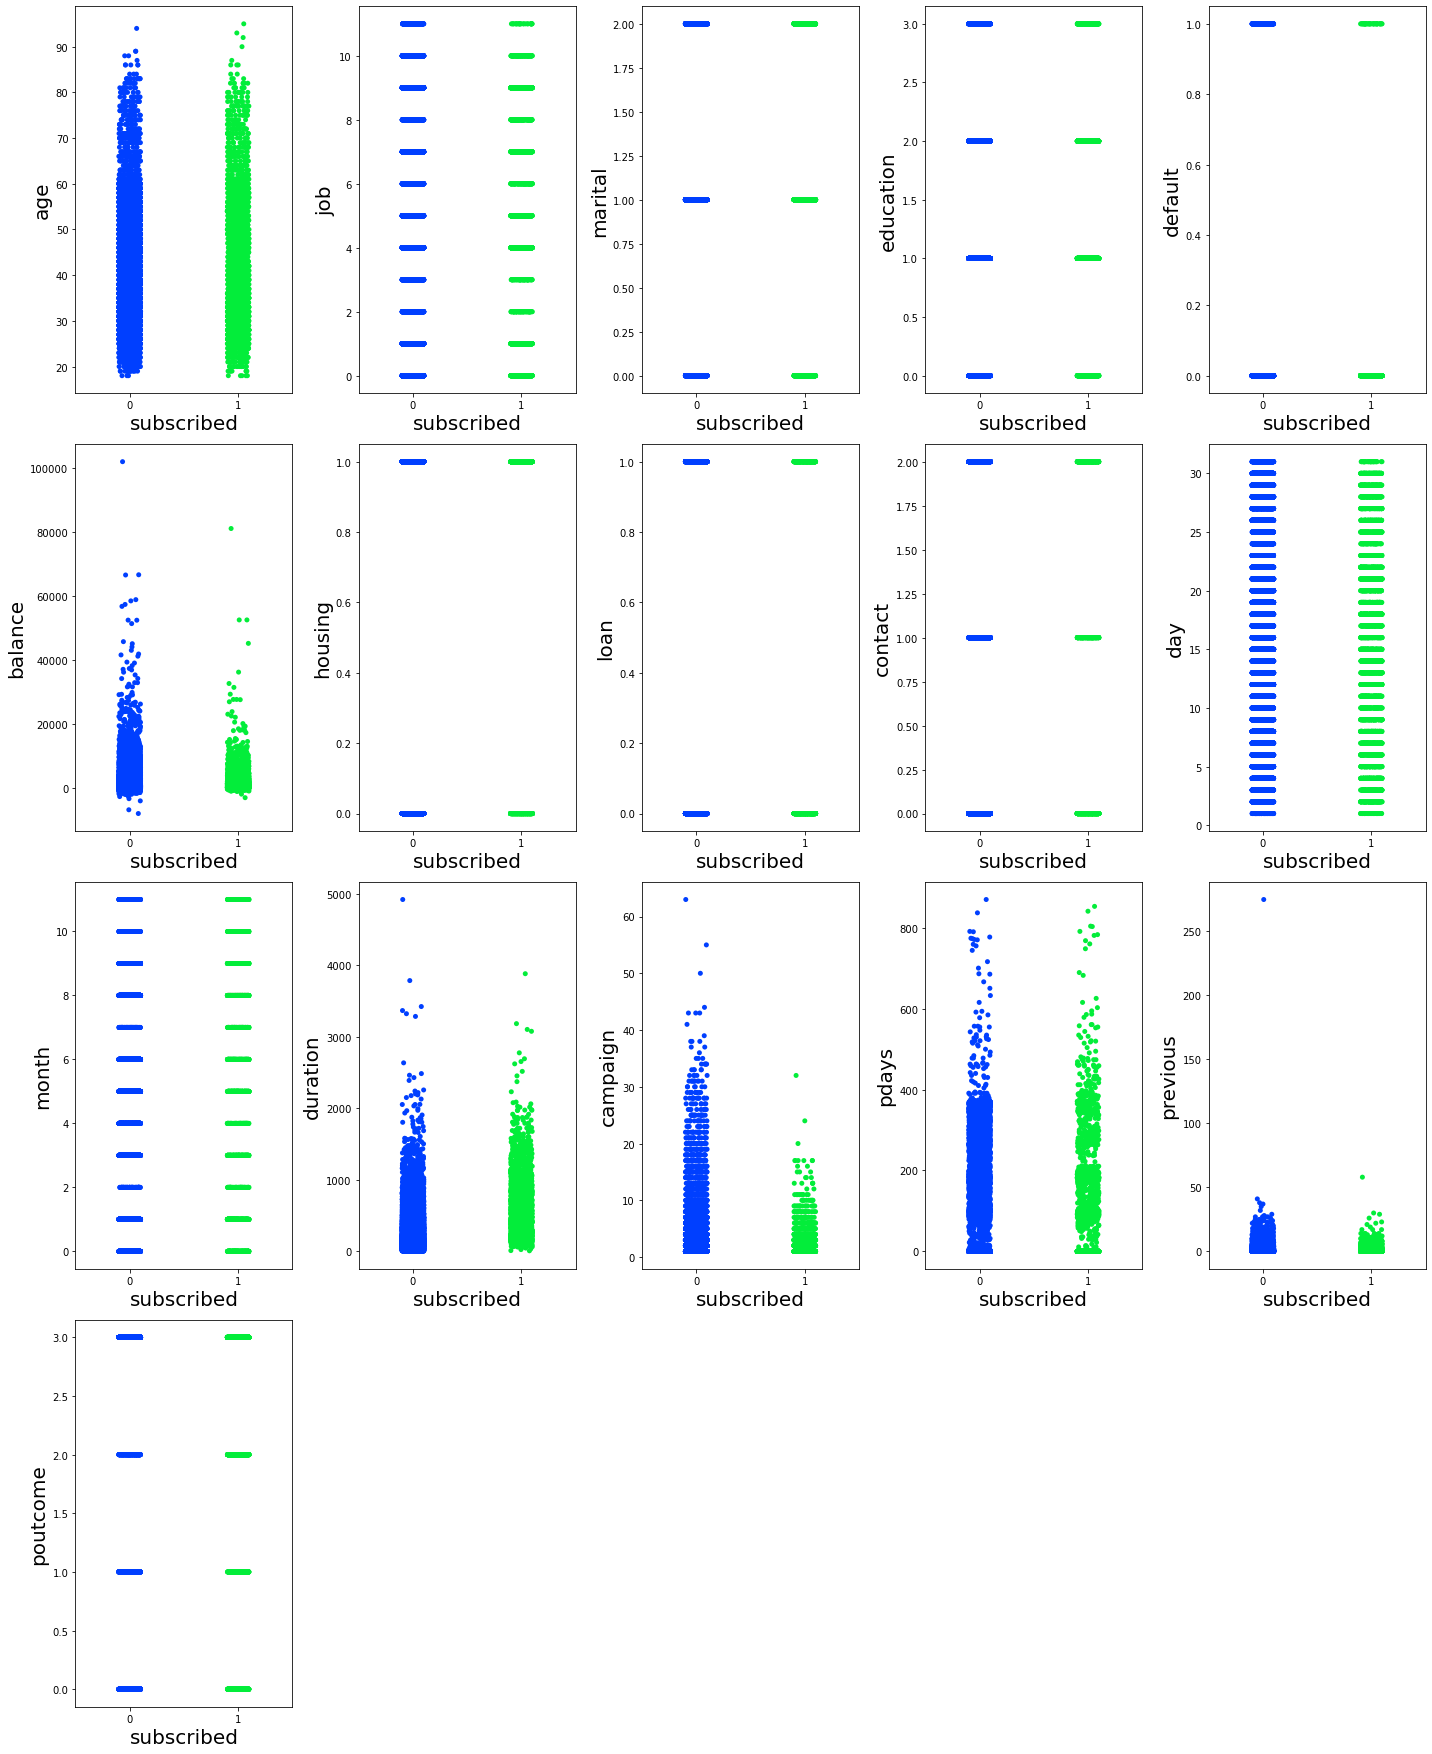

In [150]:
#interpreting relationship between independent variables and dependent class
x = term_deposit.drop(columns = ['subscribed'])
y = term_deposit['subscribed']
plt.figure(figsize = (20,30))
plotnum = 1

y = term_deposit['subscribed']
for col in x:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('subscribed',fontsize = 20)
        plt.ylabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()


In [151]:
x.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous     49.302348
poutcome     -1.996421
dtype: float64

balance , duration, campaign, pdays, default,loan, previous and poutcome are skewd

<AxesSubplot:xlabel='subscribed', ylabel='age'>

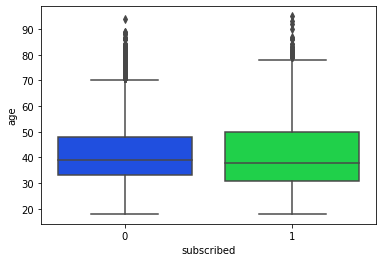

In [152]:
# Plot a boxplot to check for Outliers
# Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('subscribed', 'age', data = term_deposit)


<AxesSubplot:xlabel='subscribed', ylabel='job'>

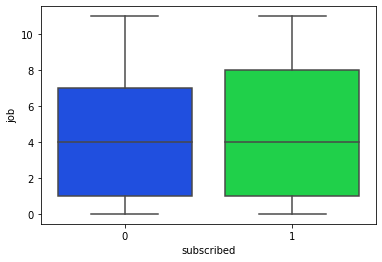

In [153]:
sns.boxplot('subscribed', 'job', data = term_deposit)


<AxesSubplot:xlabel='subscribed', ylabel='marital'>

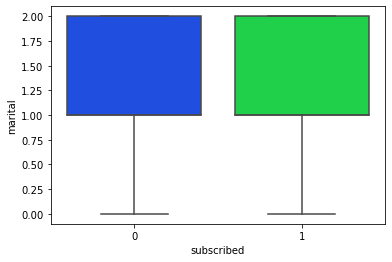

In [154]:
sns.boxplot('subscribed', 'marital', data = term_deposit)

<AxesSubplot:xlabel='subscribed', ylabel='education'>

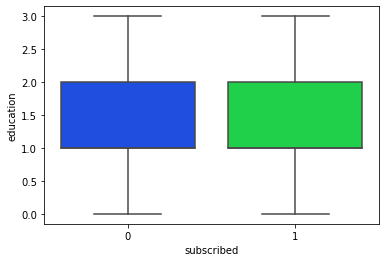

In [155]:
sns.boxplot('subscribed', 'education', data = term_deposit)

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

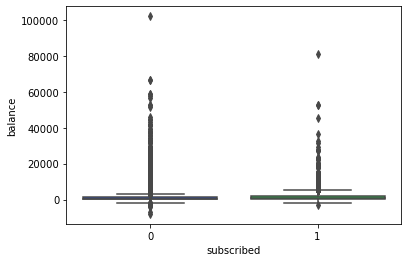

In [156]:
sns.boxplot('subscribed', 'balance', data = term_deposit)

<AxesSubplot:xlabel='subscribed', ylabel='previous'>

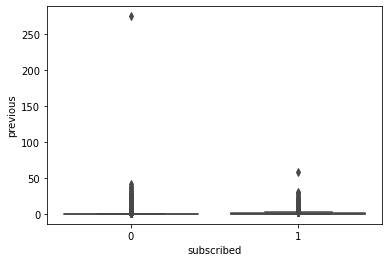

In [157]:
sns.boxplot('subscribed', 'previous', data = term_deposit)

<AxesSubplot:xlabel='subscribed', ylabel='pdays'>

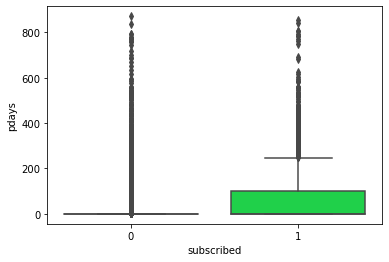

In [158]:
sns.boxplot('subscribed', 'pdays', data = term_deposit)

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

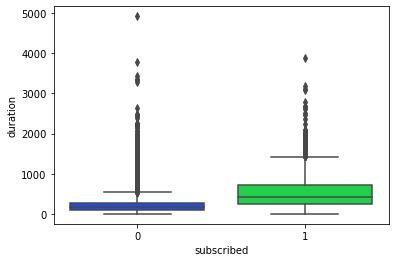

In [159]:
sns.boxplot('subscribed', 'duration', data = term_deposit)

<AxesSubplot:xlabel='subscribed', ylabel='campaign'>

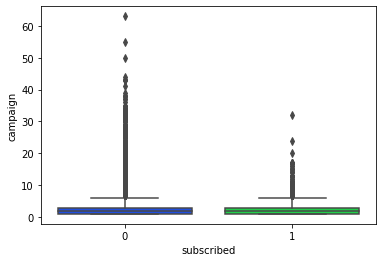

In [160]:
sns.boxplot('subscribed', 'campaign', data = term_deposit)

thus the describe function and  boxplot shows that following columns has outliers
campaign
balance
previous
pdays
duration
age

Z score method to remove outliers

In [161]:
t= term_deposit.copy()

from scipy.stats import zscore

zscor = zscore(t)
zabs = np.abs(zscor)
df = t[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(t.shape)

(27584, 17)
(31647, 17)


In [162]:
# Checking the dataloss in %

loss = (31647-27584)/31647*100
loss

12.83849969981357

In [163]:
df.skew()

age           0.439159
job           0.258302
marital      -0.095968
education     0.197092
default       0.000000
balance       2.433928
housing      -0.207765
loan          1.829242
contact       0.698882
day           0.075854
month        -0.469448
duration      1.596175
campaign      2.064222
pdays         2.799415
previous      3.657231
poutcome     -2.449518
subscribed    2.624756
dtype: float64

In [164]:
x.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous     49.302348
poutcome     -1.996421
dtype: float64

skewness has been reduced in df compared to x

reducing skewness further

In [165]:
term_deposit = df.copy()
feat = ['balance','loan','duration','campaign','pdays','previous','poutcome']

skewdf = term_deposit[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

balance          NaN
loan             NaN
duration         NaN
campaign    0.598670
pdays      -2.999089
previous         NaN
poutcome         NaN
dtype: float64

In [166]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = term_deposit[feat].copy()
df1.skew()


balance     2.433928
loan        1.829242
duration    1.596175
campaign    2.064222
pdays       2.799415
previous    3.657231
poutcome   -2.449518
dtype: float64

In [167]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

balance     0.529412
loan        1.829242
duration    0.003741
campaign    0.205997
pdays       2.057313
previous    2.056334
poutcome   -2.076244
dtype: float64

In [168]:
transformed.index = term_deposit.index
term_deposit[feat] = transformed[feat]
x = term_deposit.drop(columns = ['subscribed'])
y = term_deposit['subscribed']
x.skew()

age          0.439159
job          0.258302
marital     -0.095968
education    0.197092
default      0.000000
balance      0.529412
housing     -0.207765
loan         1.829242
contact      0.698882
day          0.075854
month       -0.469448
duration     0.003741
campaign     0.205997
pdays        2.057313
previous     2.056334
poutcome    -2.076244
dtype: float64

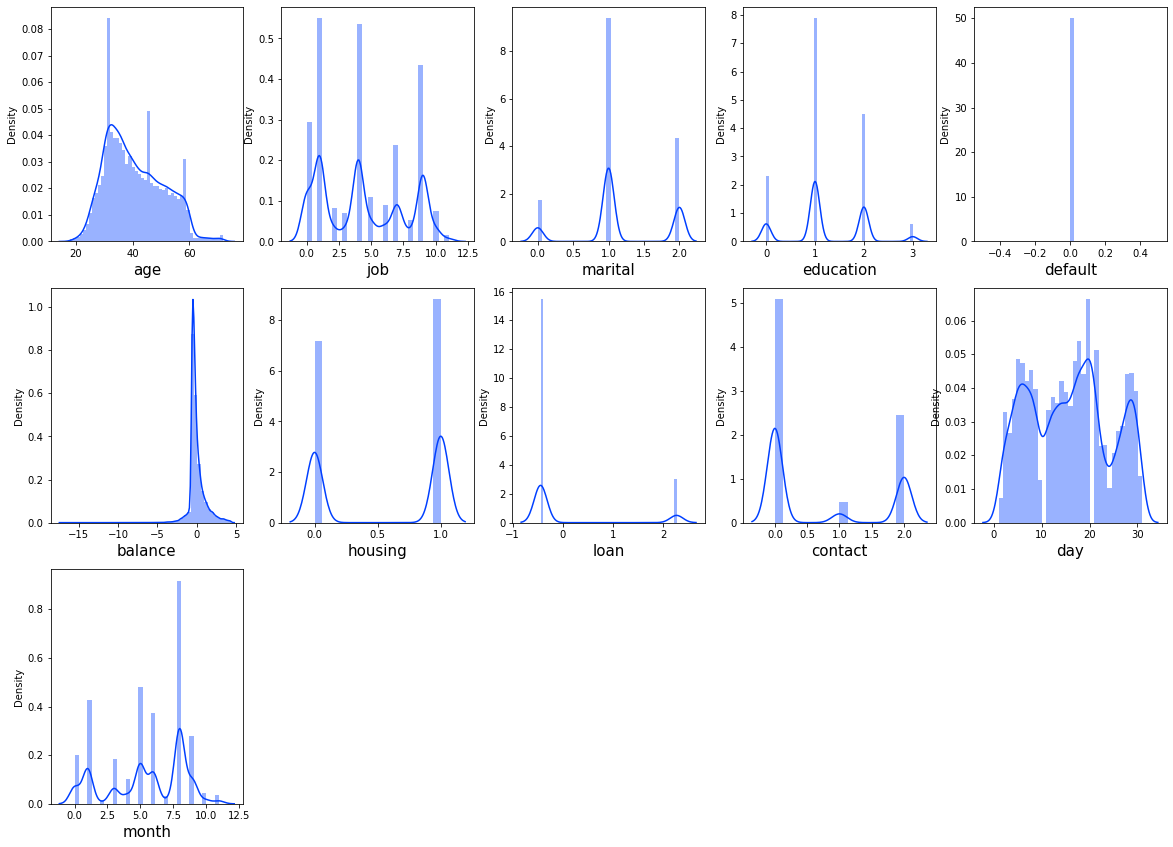

In [169]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

-Distribution looks much more normalised now

# Data Standardization

In [170]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[ 1.51966919, -1.32228288, -0.27903433, ..., -0.40609152,
        -0.40614368,  0.4050244 ],
       [-0.9575818 ,  2.02176653, -0.27903433, ..., -0.40609152,
        -0.40614368,  0.4050244 ],
       [-1.35394196,  0.80574856, -0.27903433, ..., -0.40609152,
        -0.40614368,  0.4050244 ],
       ...,
       [-1.15576188, -0.10626491,  1.3744314 , ..., -0.40609152,
        -0.40614368,  0.4050244 ],
       [ 1.22239907, -0.10626491, -1.93250006, ..., -0.40609152,
        -0.40614368,  0.4050244 ],
       [-0.85849176, -0.10626491,  1.3744314 , ..., -0.40609152,
        -0.40614368,  0.4050244 ]])

In [171]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,age,1.271567
1,job,1.050103
2,marital,1.229848
3,education,1.067843
4,default,NaN
5,balance,1.040283
6,housing,1.176618
7,loan,1.023357
8,contact,1.331614
9,day,1.023362


# PCA (Principal component Analysis )

In [172]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

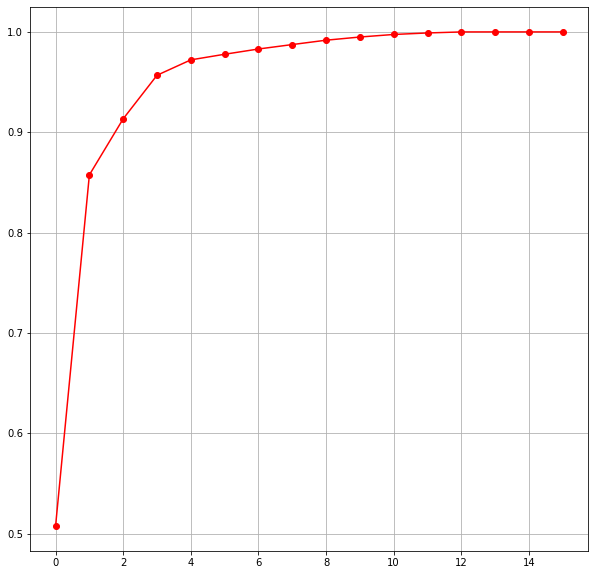

In [173]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

AS per the graph, we can see that 12 principal components attribute for 90% of variation in the data. we shall pick the first 12 components for our prediction.

In [174]:
# PCA with 12 components for our prediction.
pca_new = PCA(n_components=12)
x_new = pca_new.fit_transform(x)
x_new

array([[ 15.24359874,   3.57004981,  -5.23502626, ...,   1.25294209,
          1.72188835,  -0.09871537],
       [ -9.8289008 ,   3.96247317,   6.24104945, ...,   0.48093171,
         -0.78961778,   0.29445595],
       [-13.73721695,   1.79137501,   2.52159557, ...,   0.2465611 ,
         -0.71961008,   0.59577154],
       ...,
       [-11.61280532,  -4.13564816,  -1.28356537, ...,   1.38684091,
          0.26840581,  -0.37694946],
       [ 12.63734235, -10.49141855,  -0.3547775 , ...,   1.07284552,
          0.5871609 ,   0.79333444],
       [ -8.37052031,  -9.07987606,   1.56649158, ...,   0.73505167,
          0.53620242,  -0.58413785]])

In [175]:
from sklearn.feature_selection import SelectKBest, f_classif
xbest = x.drop(columns = ['age','month','day'])
scaled_x = sc.fit_transform(xbest)

# Train Test Split

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .31, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.9132366697848456 on Random State: 94


In [177]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .30, random_state=i)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Data Modeling

In [178]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
LOGR.fit(x_train,y_train)
RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)
SV.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [179]:
## Logistic Regression Model Accuracy
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[7279  129]
 [ 626  242]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7408
           1       0.65      0.28      0.39       868

    accuracy                           0.91      8276
   macro avg       0.79      0.63      0.67      8276
weighted avg       0.89      0.91      0.89      8276



In [180]:
# Random Forest Classifier Model Accuracy

RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[7248  160]
 [ 607  261]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7408
           1       0.62      0.30      0.40       868

    accuracy                           0.91      8276
   macro avg       0.77      0.64      0.68      8276
weighted avg       0.89      0.91      0.89      8276



In [181]:
# Decision Tree Classifier Model Accuracy
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[6843  565]
 [ 540  328]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7408
           1       0.37      0.38      0.37       868

    accuracy                           0.87      8276
   macro avg       0.65      0.65      0.65      8276
weighted avg       0.87      0.87      0.87      8276



In [182]:
# SV Classifier Model Accuracy
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[7357   51]
 [ 713  155]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7408
           1       0.75      0.18      0.29       868

    accuracy                           0.91      8276
   macro avg       0.83      0.59      0.62      8276
weighted avg       0.89      0.91      0.88      8276



In [183]:
# KNeighbors Classifier Model Accuracy
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)

print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[7178  230]
 [ 640  228]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7408
           1       0.50      0.26      0.34       868

    accuracy                           0.89      8276
   macro avg       0.71      0.62      0.64      8276
weighted avg       0.87      0.89      0.88      8276



# Model Cross Validation

In [184]:
from sklearn.model_selection import cross_val_score as cvs

#Decision Tree Classifier
print("Decision Tree Classifier:" ,cvs(DTC,scaled_x,y,cv=5).mean())

#Logistic Regression
print("Logistic Regression:",cvs(LOGR,scaled_x,y,cv=5).mean())

# Random Forest Classifier
print(" Random Forest Classifier:",cvs(RFC,scaled_x,y,cv=5).mean())



# SV Classifier
print("SV Classifier:",cvs(SV,scaled_x,y,cv=5).mean())

#K Nearest Neighnors Classifier
print("K Nearest Neighnors Classifier:",cvs(KNN,scaled_x,y,cv=5).mean())

Decision Tree Classifier: 0.8689823648783909
Logistic Regression: 0.9088239488650217
 Random Forest Classifier: 0.9077363684244217
SV Classifier: 0.9079901360985486
K Nearest Neighnors Classifier: 0.8978393765568432


# ROC AUC Scores

In [185]:
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,DTCpred))

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,LOGRpred))

#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,RFCpred))

#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,SVpred))

#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier:",roc_auc_score(y_test,KNNpred))

Decision Tree Classifier: 0.6508056429218382
Logistic Regression: 0.6306941182032627
Random Forest Classifier: 0.6395464860507011
SV Classifier: 0.585843489663684
K Nearest Neighbors Classifier: 0.6158126474306019


Random Forest Classifier is the best model for the dataset with score 64%

# ROC AUC Curves

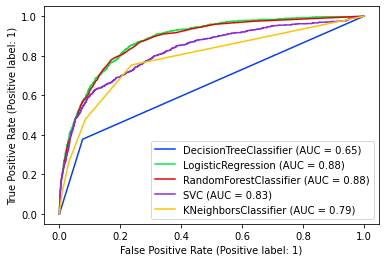

In [186]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

# Hyper Parameter Tuning

RandomForest Classifier

In [189]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'criterion':['gini','entropy','log_loss']}
Gridcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5 )
Gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [30, 50, 60]})

In [190]:
Gridcv.best_params_

{'criterion': 'gini', 'n_estimators': 30}

In [191]:
Best_mod = RandomForestClassifier(n_estimators = 30,criterion = 'gini')
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

90.87723537941035


In [192]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[7264,  144],
       [ 611,  257]], dtype=int64)

Logistic Regression

In [199]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 'multi_class':['auto', 'ovr', 'multinomial']}
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [200]:
GridCV.best_params_

{'multi_class': 'multinomial', 'penalty': 'l2'}

In [201]:
Best_mod2 = LogisticRegression(penalty= 'l2',multi_class = 'multinomial')
Best_mod2.fit(x_train,y_train)
lrpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

90.94973417109715


In [202]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[7279,  129],
       [ 620,  248]], dtype=int64)

In [203]:
roc_auc_score(y_test,rfpred)

0.6383222521921749

In [204]:
roc_auc_score(y_test,lrpred)

0.6341503394014192

after comparing the accuracies and ROC AUC scores of the Random Forest Classifier Model and Logistic Regression Model, Random Forest Classifier Model is performing better. Random Forest Classifier also has better Confusion matrix performance than Logistic Regression

In [205]:
import joblib
joblib.dump(Best_mod,"term_deposit.obj")

['term_deposit.obj']

In [206]:
test_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [210]:
object_datatype = []
for x in test_data.dtypes.index:
    if test_data.dtypes[x] == 'O':
        object_datatype.append(x)

le= LabelEncoder()
for col in object_datatype:
    test_data[col]= le.fit_transform(test_data[col])
    
test_data


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [211]:
test_data.skew()

ID          -0.013625
age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

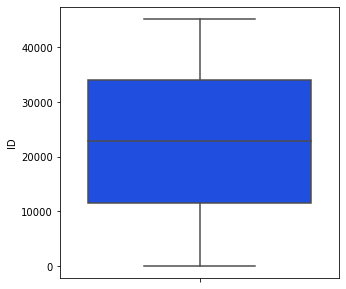

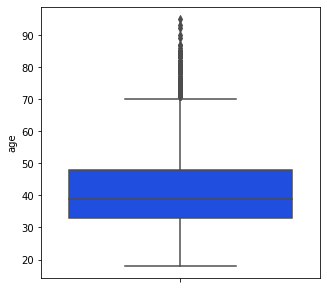

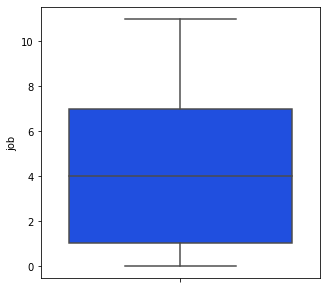

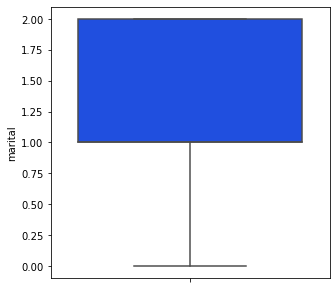

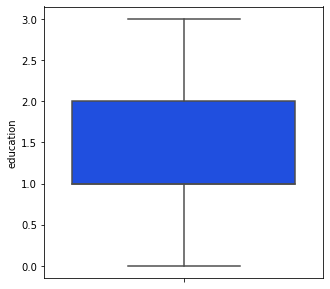

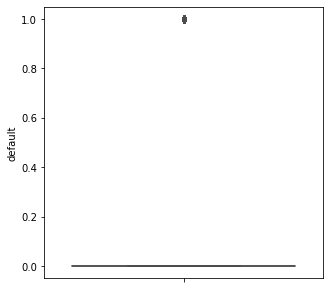

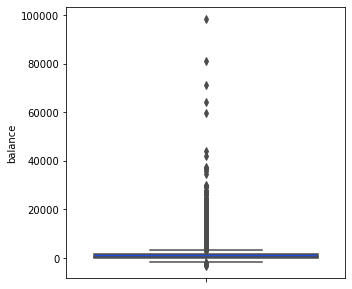

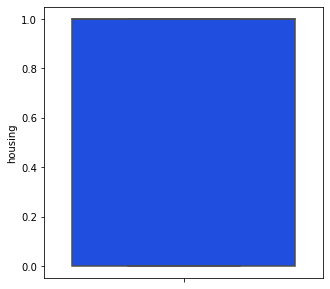

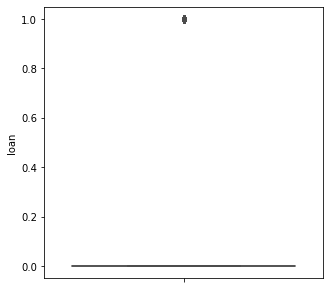

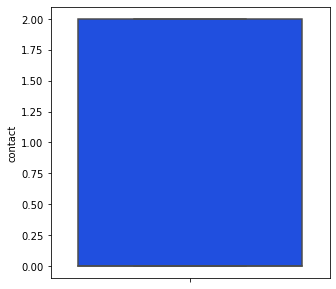

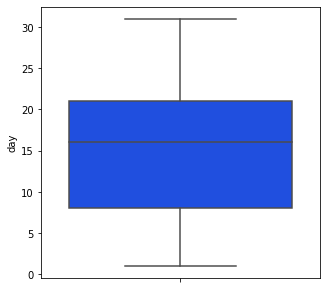

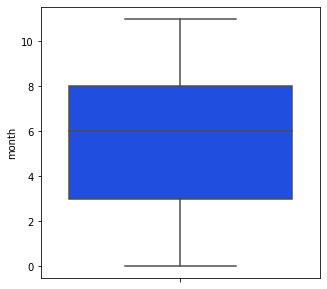

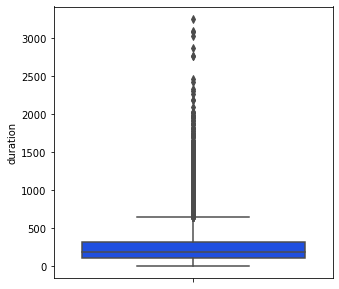

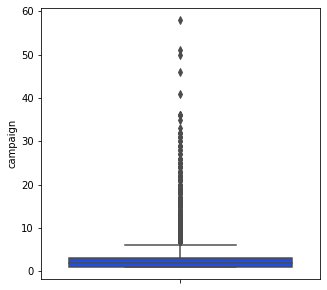

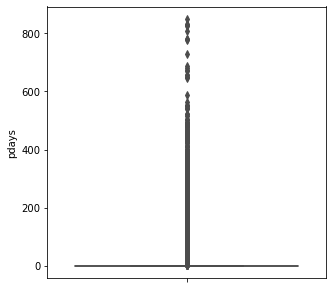

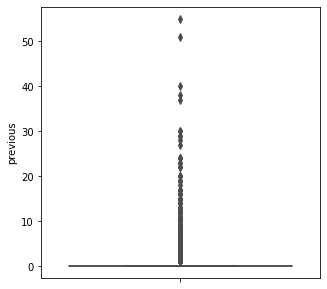

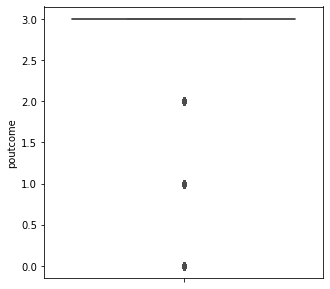

In [213]:
# Plot a boxplot to check for Outliers
column_nm = list (test_data.columns)
for col in test_data[column_nm]:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(y=col, data= test_data)



some of the column viz age, duration, previous, pdays etc has outlier

Z score method to remove outliers

In [214]:
t= test_data.copy()

from scipy.stats import zscore

zscor = zscore(t)
zabs = np.abs(zscor)
df = t[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(t.shape)

(11821, 17)
(13564, 17)


In [215]:
# Checking the dataloss in %

loss = (13564-11821)/13564*100
loss

12.850191683869063

In [216]:
df.skew()

ID           0.051465
age          0.434698
job          0.249193
marital     -0.102106
education    0.193181
default      0.000000
balance      2.467216
housing     -0.213912
loan         1.888434
contact      0.728608
day          0.100284
month       -0.460334
duration     1.580973
campaign     1.966766
pdays        2.706946
previous     3.375478
poutcome    -2.329802
dtype: float64

In [217]:
mod = joblib.load("term_deposit.obj")

In [222]:
xbest = df.drop(columns = ['ID','age','month','day'])
a= np.array(xbest)

In [224]:
subscribed = np.array(mod.predict(a))
subscribed

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
#thus the value(target) has been predicted